           Pclass         Sex         Age       SibSp       Parch        Fare
count  418.000000  418.000000  418.000000  418.000000  418.000000  418.000000
mean     2.265550    0.363636   29.599282    0.447368    0.392344   35.576535
std      0.841838    0.481622   12.703770    0.896760    0.981429   55.850103
min      1.000000    0.000000    0.170000    0.000000    0.000000    0.000000
25%      1.000000    0.000000   23.000000    0.000000    0.000000    7.895800
50%      3.000000    0.000000   27.000000    0.000000    0.000000   14.454200
75%      3.000000    1.000000   35.750000    1.000000    0.000000   31.471875
max      3.000000    1.000000   76.000000    8.000000    9.000000  512.329200


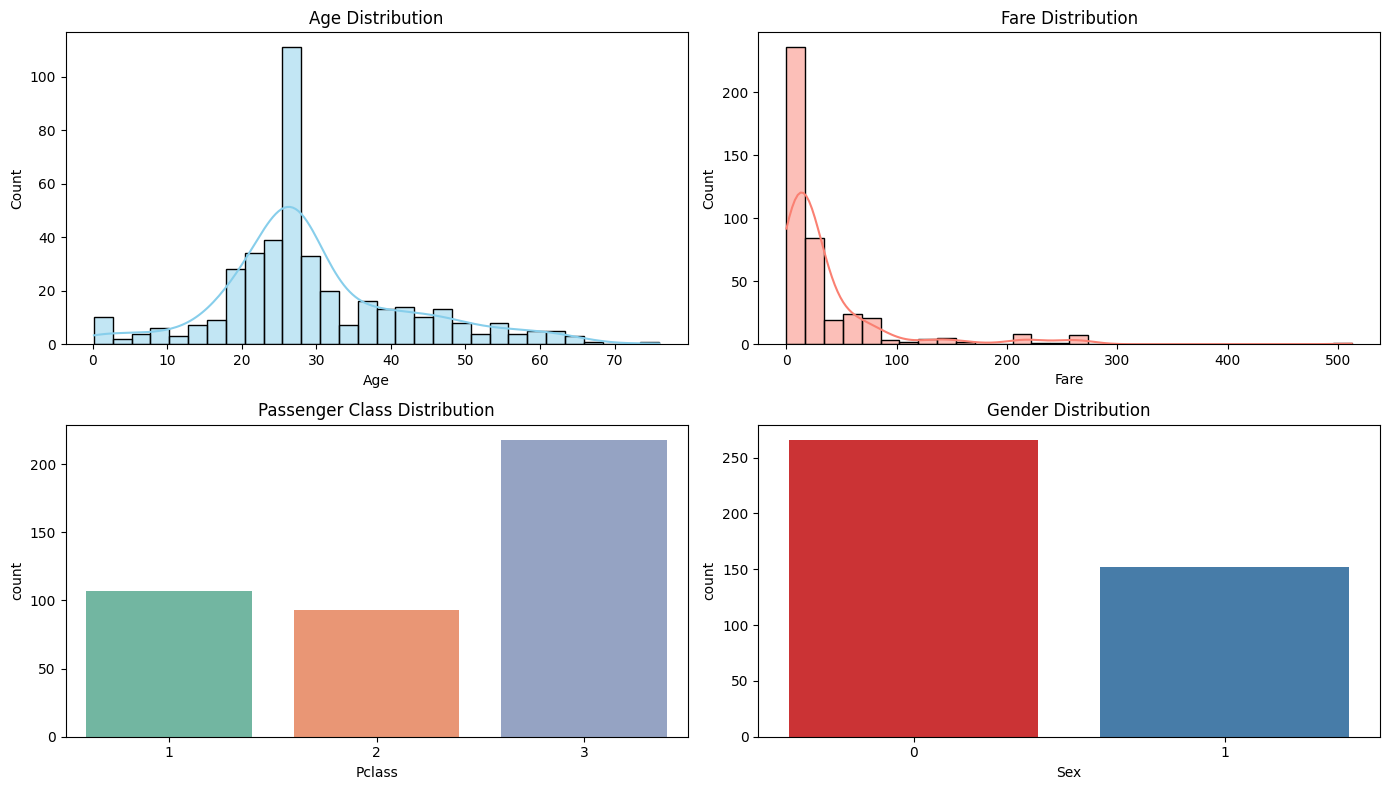

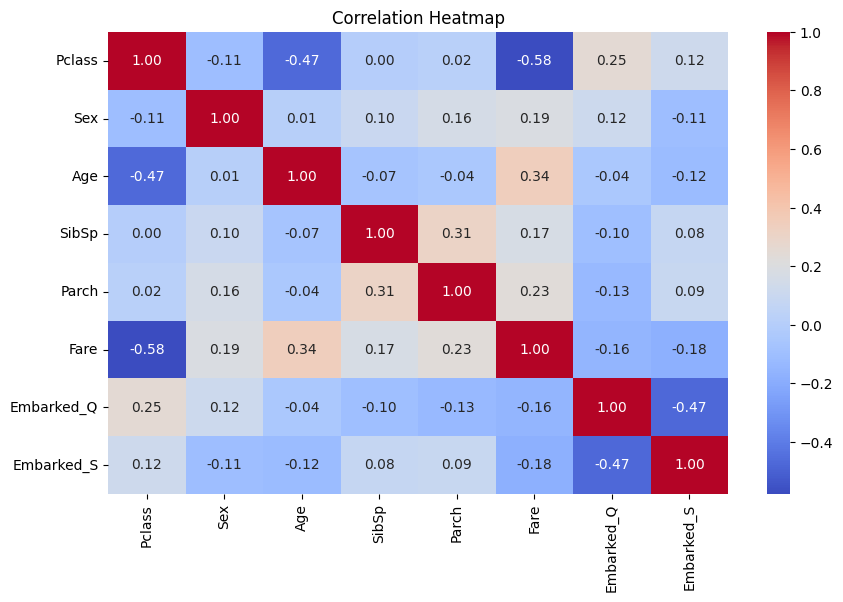

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
df = pd.read_csv("test.csv")

# Drop unnecessary column
df_clean = df.drop(columns=['Cabin'])

# ✅ Fix chained assignment (avoid inplace=True)
df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].median())
df_clean['Fare'] = df_clean['Fare'].fillna(df_clean['Fare'].median())

# Encode categorical variables
df_clean['Sex'] = df_clean['Sex'].map({'male': 0, 'female': 1})
df_clean = pd.get_dummies(df_clean, columns=['Embarked'], drop_first=True)

# Drop unused columns
df_clean = df_clean.drop(columns=['PassengerId', 'Name', 'Ticket'])

# Summary stats
summary = df_clean.describe()
print(summary)

# --- Visualization ---
plt.figure(figsize=(14, 8))

# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(df_clean['Age'], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution")

# Fare distribution
plt.subplot(2, 2, 2)
sns.histplot(df_clean['Fare'], bins=30, kde=True, color="salmon")
plt.title("Fare Distribution")

# Passenger class distribution (✅ fix: add hue to use palette)
plt.subplot(2, 2, 3)
sns.countplot(x='Pclass', hue='Pclass', data=df_clean, palette="Set2", legend=False)
plt.title("Passenger Class Distribution")

# Gender distribution (✅ fix: add hue to use palette)
plt.subplot(2, 2, 4)
sns.countplot(x='Sex', hue='Sex', data=df_clean, palette="Set1", legend=False)
plt.title("Gender Distribution")

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
